In [13]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Defining the model

model = Sequential([
    Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = "relu"),
    MaxPooling2D((3,3)),
    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = "softmax")
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 5,594
Trainable params: 5,594
Non-trainable params: 0
____________________________________________________

In [18]:
# Compiling the model and defining the optimizers

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [19]:
# Loading Fashion MNIST Dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist

(train_img, train_labels), (test_img, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [20]:
train_img.shape # 60k images of 28x28

(60000, 28, 28)

In [21]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [22]:
# Normalize the images

train_img = train_img / 255.
test_img = test_img / 255.

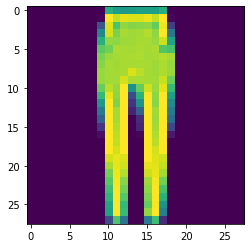

 Label: Trouser


In [24]:
# Display one of the images

i = 4567

img = train_img[i, :, :]
plt.imshow(img)
plt.show()

print(f" Label: {labels[train_labels[i]]}")

In [27]:
# Fit the model

history = model.fit(train_img[..., np.newaxis], train_labels, epochs = 10, batch_size = 32)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.3574 - sparse_categorical_accuracy: 0.8719
Epoch 2/10
60000/60000 [==============================] - 21s 346us/sample - loss: 0.3473 - sparse_categorical_accuracy: 0.8748
Epoch 3/10
60000/60000 [==============================] - 21s 344us/sample - loss: 0.3380 - sparse_categorical_accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 20s 335us/sample - loss: 0.3286 - sparse_categorical_accuracy: 0.8818
Epoch 5/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.3195 - sparse_categorical_accuracy: 0.8866
Epoch 6/10
60000/60000 [==============================] - 22s 362us/sample - loss: 0.3141 - sparse_categorical_accuracy: 0.8872
Epoch 7/10
60000/60000 [==============================] - 21s 345us/sample - loss: 0.3081 - sparse_categorical_accuracy: 0.8896
Epoch 8/10
60000/60000 [==============================] - 20s 335us/sample - loss

In [28]:
# Plotting the data

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy
0,0.357413,0.871950
1,0.347266,0.874817
2,0.337972,0.878617
3,0.328648,0.881783
4,0.319476,0.886583


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

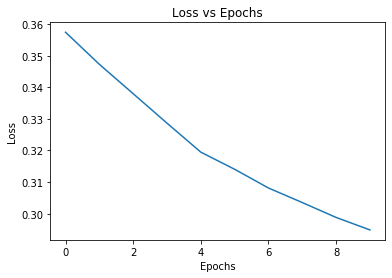

In [29]:
# Plotting the loss

loss_plot = df.plot(y="loss", title = "Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel = "Loss")